In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

<h2>Import Data and compute daily returns</h2>

In [2]:
BASE_DIR = Path.cwd()
OUTPUTS_DIR = BASE_DIR / "outputs"
PRICES_PATH = OUTPUTS_DIR / "prices.csv"

prices = pd.read_csv(PRICES_PATH, index_col=0, parse_dates=True)
returns = prices.pct_change()
returns = returns.dropna()
returns

,AAPL,MSFT,QQQ,SPY
Date,,,,
2020-01-03,-0.009745,-0.012452,-0.009160,-0.007592
2020-01-06,0.007968,0.002585,0.006443,0.003831
2020-01-07,-0.004639,-0.009118,-0.000139,-0.002812
2020-01-08,0.016021,0.015928,0.007516,0.005330
2020-01-09,0.021241,0.012493,0.008473,0.006780
...,...,...,...,...
2025-12-22,-0.009866,-0.002058,0.004794,0.006230
2025-12-23,0.005130,0.003980,0.004683,0.004570
2025-12-24,0.005324,0.002403,0.002926,0.003518


<h2>Compute Annualized Volatility</h2>
Annualized volatility is computed as $\sigma_{\text{daily}} \sqrt{252}$.

In [3]:
ann_vol = returns.std() * np.sqrt(252)
ann_vol

AAPL    0.318312
MSFT    0.295651
QQQ     0.253255
SPY     0.207593
dtype: float64

<h2>Compute Best and Worst Day</h2>

In [4]:
best_day = returns.max()
worst_day = returns.min()
print(f"{best_day}\n\n{worst_day}")

AAPL    0.153289
MSFT    0.142184
QQQ     0.120025
SPY     0.105019
dtype: float64

AAPL   -0.128647
MSFT   -0.147401
QQQ    -0.119788
SPY    -0.109424
dtype: float64


<h2>Compute Max Drawdown</h2>
$$
\text{Max Drawdown}
= \min_{t} \left( \frac{V_t}{\max_{s \le t} V_s} - 1 \right)
$$

In [5]:
cummulative_value = (1 + returns).cumprod()
peak = cummulative_value.cummax()
drawdown = cummulative_value / peak - 1
max_dd = drawdown.min()
print(max_dd)

AAPL   -0.333596
MSFT   -0.371485
QQQ    -0.351187
SPY    -0.337173
dtype: float64


<h2>Historical VaR 95% (5th Percentile)</h2>

In [6]:
var_95 = returns.quantile(0.05)
var_95

AAPL   -0.030718
MSFT   -0.027309
QQQ    -0.025337
SPY    -0.018122
Name: 0.05, dtype: float64

<h2>New Table</h2>

In [7]:
risk_table = pd.DataFrame({
    "ann_vol": ann_vol,
    "max_drawdown": max_dd,
    "best_day": best_day,
    "worst_day": worst_day,
    "vaR_95": var_95
})
risk_table_pct = (risk_table * 100).round(2)
risk_table_pct

,ann_vol,max_drawdown,best_day,worst_day,vaR_95
AAPL,31.83,-33.36,15.33,-12.86,-3.07
MSFT,29.57,-37.15,14.22,-14.74,-2.73
QQQ,25.33,-35.12,12.00,-11.98,-2.53
SPY,20.76,-33.72,10.50,-10.94,-1.81


<h2>Normalized Prices</h2>

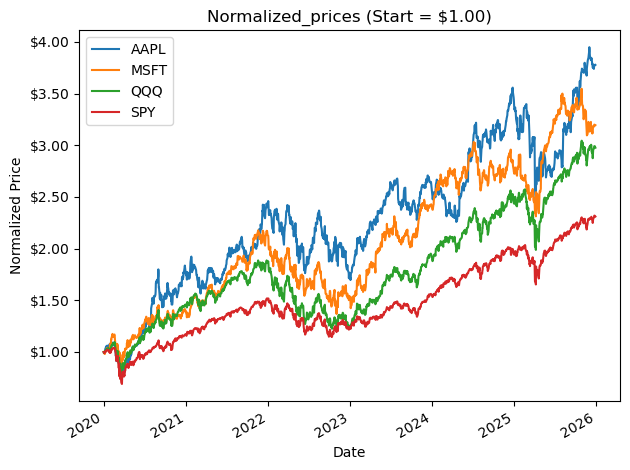

In [8]:
normalized = prices / prices.iloc[0]
ax = normalized.plot()
ax.set_title("Normalized_prices (Start = $1.00)")
ax.set_xlabel("Date")
ax.set_ylabel("Normalized Price")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.tight_layout()
plt.show()

<h2>Rolling volatility</h2>

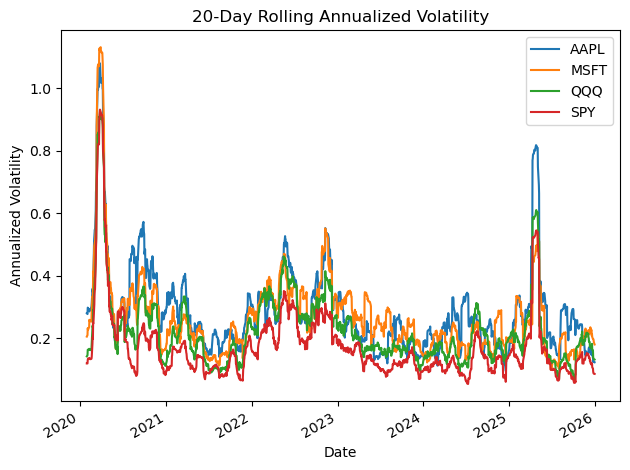

In [9]:
window = 20
rolling_vol = returns.rolling(window).std() * np.sqrt(252)
ax = rolling_vol.plot()
ax.set_title(f"{window}-Day Rolling Annualized Volatility")
ax.set_xlabel("Date")
ax.set_ylabel("Annualized Volatility")
plt.tight_layout()
plt.show()

<h2>Drawdown Chart</h2>

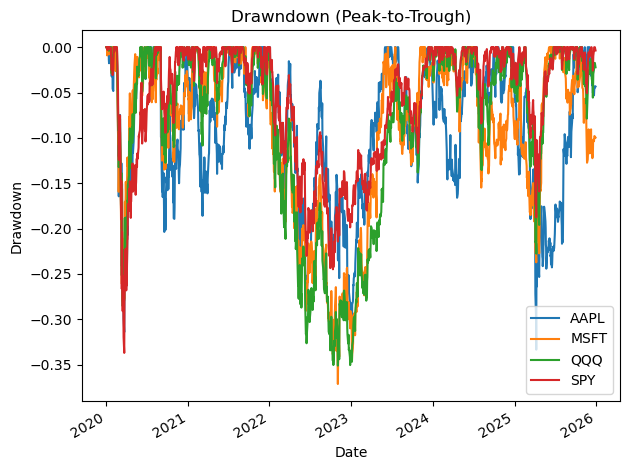

In [10]:
ax = drawdown.plot()
ax.set_title("Drawndown (Peak-to-Trough)")
ax.set_xlabel("Date")
ax.set_ylabel("Drawdown")
plt.tight_layout()
plt.show()

<h2>Correlation Heatmap</h2>

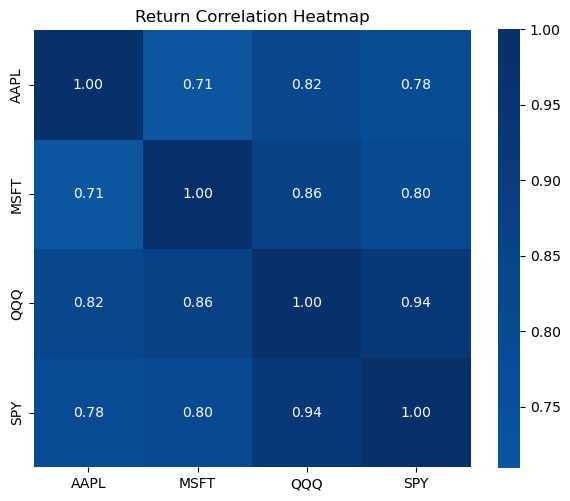

In [11]:
corr = returns.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", center=0, square=True)
plt.title("Return Correlation Heatmap")
plt.tight_layout()
plt.show()

Key Risk Insights

• Tech assets are more volatile than the market. AAPL, MSFT, and QQQ exhibit higher annualized volatility than SPY, reflecting greater return variability from technology exposure.

• Tech-heavy assets suffer deeper drawdowns during market stress. QQQ and individual tech stocks experience larger peak-to-trough losses than the broader market, indicating amplified downside risk in downturns.

• Limited diversification within large-cap tech. AAPL and MSFT are highly correlated, and both are strongly correlated with QQQ, providing limited risk reduction when held together.

• SPY provides lower risk and smoother performance. The market benchmark shows the lowest volatility, smaller worst-day losses, and lower VaR, highlighting the benefits of broad diversification.

• Downside tail risk is higher for tech assets. Worst-day returns and 95% VaR indicate that extreme daily losses are more frequent and severe for tech-focused assets than for the overall market.